In [10]:
!pip install pydot graphviz
#Import Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')
#shallon neural network (نوع المودل)
#CNN model

In [11]:

#Create Files_Name
image_data = "D:/archive/raw-img"

pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,cane
1,cavallo
2,elefante
3,farfalla
4,gallina
5,gatto
6,mucca
7,pecora
8,ragno
9,scoiattolo


In [12]:
import glob
import os
import numpy as np
import pandas as pd  # Corrected the import statement

image_data = 'D:/archive/raw-img'
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]

# Use zip to create a list of tuples containing file paths and labels
data = list(zip(files, labels))

# Create a DataFrame using the data
dataframe = pd.DataFrame(data, columns=["Image", "Label"])

# Display the first few rows of the DataFrame
print(dataframe)



                                                   Image               Label
0      D:/archive/raw-img\cavallo\OIP-cg2NHI1oovmuW_A...     raw-img\cavallo
1      D:/archive/raw-img\cane\OIP-tKX3fh_K6U_PcH5dTG...        raw-img\cane
2      D:/archive/raw-img\cane\OIP-SKvsrWKs3aYKlMsdgW...        raw-img\cane
3      D:/archive/raw-img\pecora\OIP-o_7aR4C_V6aw7Ffc...      raw-img\pecora
4                     D:/archive/raw-img\gatto\1142.jpeg       raw-img\gatto
...                                                  ...                 ...
26174  D:/archive/raw-img\scoiattolo\OIP-mamMUltnbIQC...  raw-img\scoiattolo
26175  D:/archive/raw-img\mucca\OIP-ka-pR1SdqqTjlaCcQ...       raw-img\mucca
26176  D:/archive/raw-img\cavallo\OIP-sZZLWpFtgLBoxgd...     raw-img\cavallo
26177  D:/archive/raw-img\ragno\OIP-uICHwaOhmz6MvwkNc...       raw-img\ragno
26178  D:/archive/raw-img\ragno\OIP-HPjDLTfMBNVq8nfvp...       raw-img\ragno

[26179 rows x 2 columns]


# Visualization

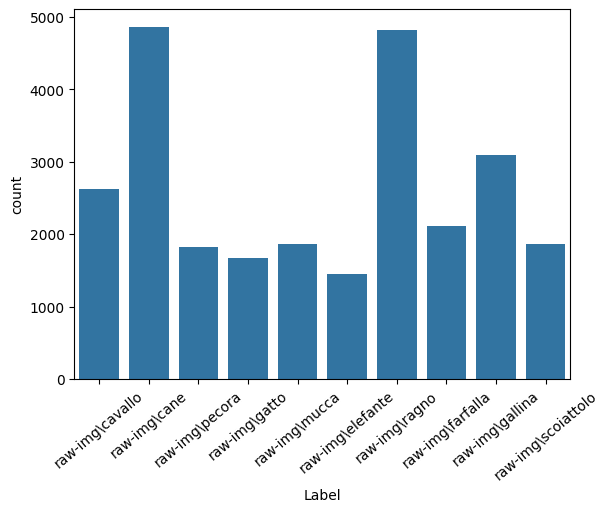

In [13]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 40);

# Split Train and Test Dataset

In [14]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


# class_names = train.class_names
class_names

In [15]:
import tensorflow as tf

# المسار إلى دليل البيانات
train_data_dir = image_data

# حجم الدُفعة(pixles) الذي سيتم استخدامه أثناء تحميل الصور
batch_size = 32

# حجم الصورة المستهدف عند تحميلها
target_size = (224, 224)

#(test) نسبة التقسيم بين بيانات التدريب والتحقق
validation_split = 0.2

# تحميل بيانات التدريب باستخدام وظيفة image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,  # بذرة لضمان تكرار النتائج
    image_size=target_size,
    batch_size=batch_size,
)

# تحميل بيانات التحقق باستخدام وظيفة image_dataset_from_directory
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,  # بذرة لضمان تكرار النتائج
    image_size=target_size,
    batch_size=batch_size,
)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [16]:
class_names = train.class_names
class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

# MobileNetV3Small Model

In [17]:
weights_path = "weights_mobilenet_v3_small_224_1.0_float_no_top_v2.h5"
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights=weights_path)
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(10,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dropout_1 (Dropout)         (None, 28224)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                282250    
                                                                 
Total params: 1221370 (4.66 MB)
Trainable params: 282250 (1.08 MB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


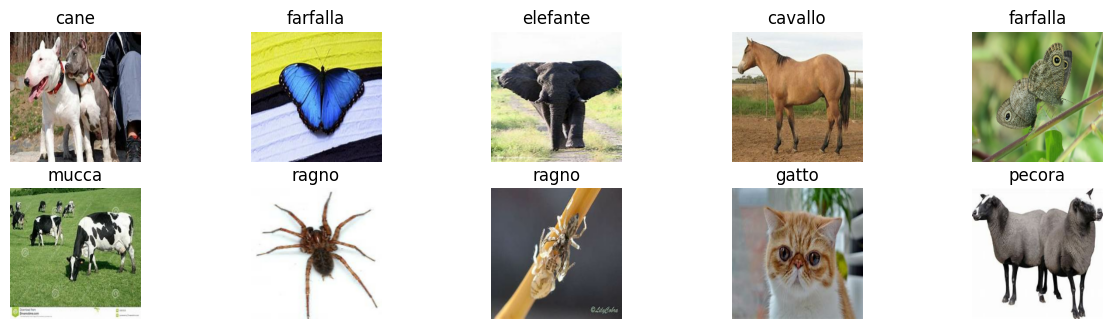

In [18]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(10):
        ax = plt.subplot(10, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [19]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [20]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [21]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20


655/655 [==============================] - 302s 453ms/step - loss: 1.6965 - accuracy: 0.8616 - val_loss: 0.7110 - val_accuracy: 0.9490
Epoch 2/20
655/655 [==============================] - 237s 358ms/step - loss: 0.9081 - accuracy: 0.9354 - val_loss: 0.7034 - val_accuracy: 0.9549
Epoch 3/20
655/655 [==============================] - 219s 331ms/step - loss: 0.6978 - accuracy: 0.9541 - val_loss: 0.5579 - val_accuracy: 0.9694
Epoch 4/20
655/655 [==============================] - 245s 370ms/step - loss: 0.6168 - accuracy: 0.9605 - val_loss: 0.4824 - val_accuracy: 0.9777
Epoch 5/20
655/655 [==============================] - 241s 364ms/step - loss: 0.4740 - accuracy: 0.9696 - val_loss: 0.5405 - val_accuracy: 0.9757
Epoch 6/20
655/655 [==============================] - 215s 325ms/step - loss: 0.4513 - accuracy: 0.9725 - val_loss: 0.5511 - val_accuracy: 0.9771
Epoch 7/20
655/655 [==============================] - 231s 353ms/step - loss: 0.4784 - accuracy: 0.9737 - val_loss: 0.6131

In [22]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

164/164 [==============================] - 35s 214ms/step - loss: 0.4824 - accuracy: 0.9777
Test Loss = 0.4823558032512665
Test Accuracy = 0.9776504039764404


In [23]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.696474,0.861631,0.710998,0.948997
1,0.908063,0.935447,0.703366,0.954919
2,0.697810,0.954068,0.557930,0.969436
3,0.616772,0.960514,0.482356,0.977650
4,0.474010,0.969586,0.540513,0.975740
5,0.451349,0.972450,0.551094,0.977077
6,0.478418,0.973692,0.613096,0.981280
7,0.476385,0.977034,0.622247,0.979561
8,0.428303,0.979135,0.631397,0.983572


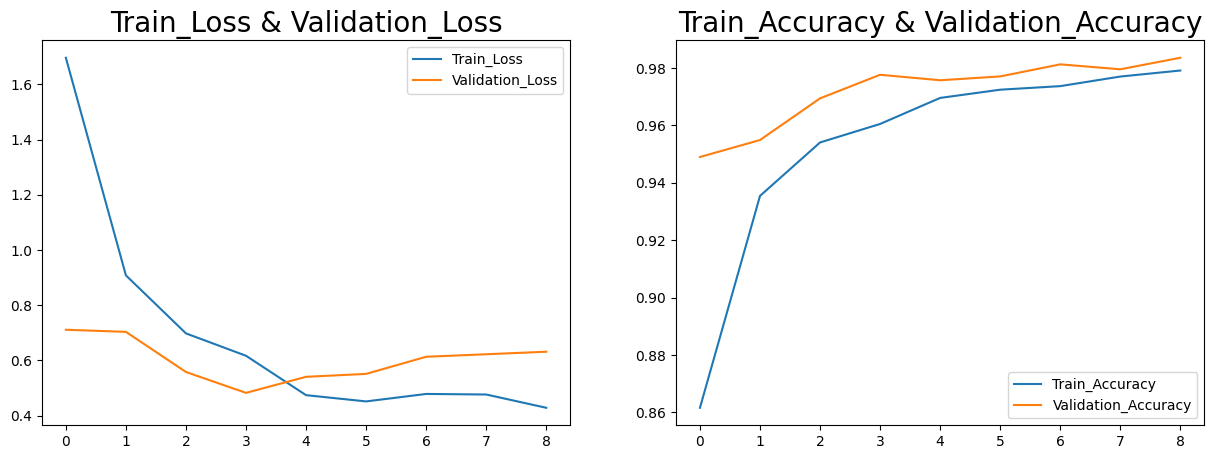

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [25]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

164/164 [==============================] - 55s 290ms/step


,Actual,Prediction
0,8,8
1,1,1
2,1,1
3,9,9
4,4,4
...,...,...
5230,7,7
5231,7,7
5232,3,3
5233,0,0


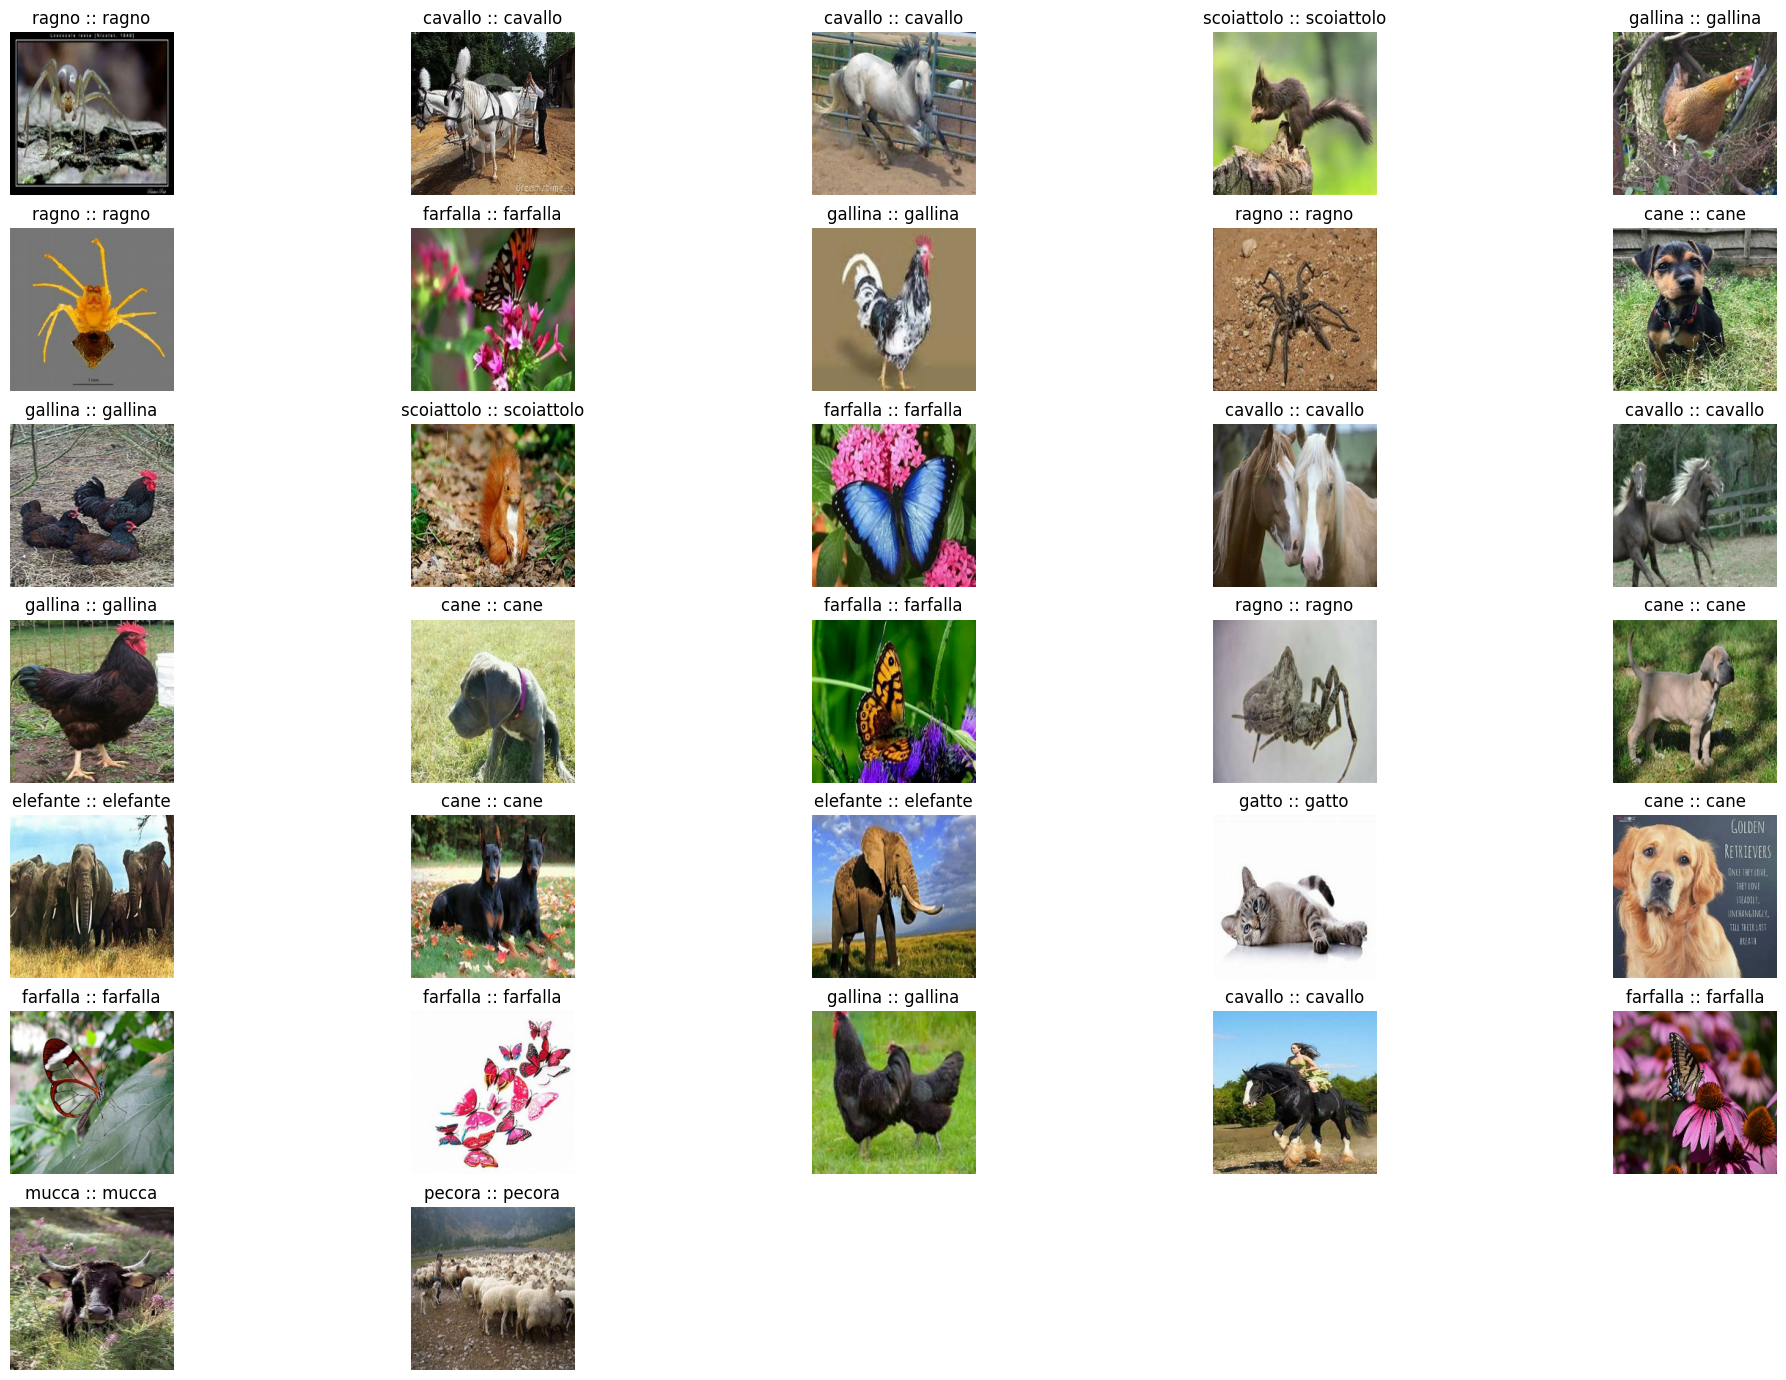

In [26]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(10,5, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

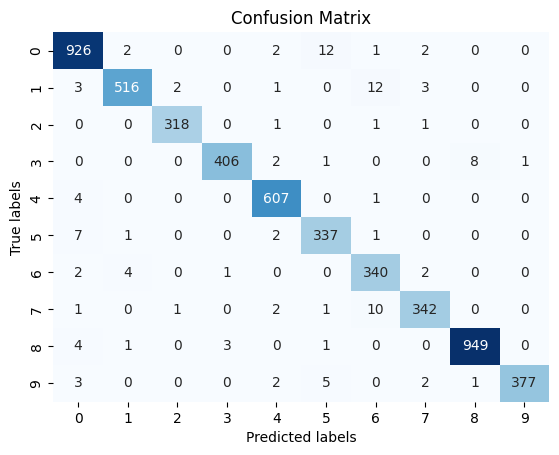

array([[926,   2,   0,   0,   2,  12,   1,   2,   0,   0],
       [  3, 516,   2,   0,   1,   0,  12,   3,   0,   0],
       [  0,   0, 318,   0,   1,   0,   1,   1,   0,   0],
       [  0,   0,   0, 406,   2,   1,   0,   0,   8,   1],
       [  4,   0,   0,   0, 607,   0,   1,   0,   0,   0],
       [  7,   1,   0,   0,   2, 337,   1,   0,   0,   0],
       [  2,   4,   0,   1,   0,   0, 340,   2,   0,   0],
       [  1,   0,   1,   0,   2,   1,  10, 342,   0,   0],
       [  4,   1,   0,   3,   0,   1,   0,   0, 949,   0],
       [  3,   0,   0,   0,   2,   5,   0,   2,   1, 377]], dtype=int64)

In [27]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [28]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 97.765%


In [31]:
import tensorflow as tf

# Save the Keras model to a file
keras_model.save('my_keras_model')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model('my_keras_model')
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets
